#**Telecom X - Análisis de Evasión de Clientes**
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#### **Diccionario de datos**
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico  
* MultipleLines: suscripción a más de una línea telefónica  
* InternetService: suscripción a un proveedor de internet  
* OnlineSecurity: suscripción adicional de seguridad en línea  
* OnlineBackup: suscripción adicional de respaldo en línea  
* DeviceProtection: suscripción adicional de protección del dispositivo  
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera  
* StreamingTV: suscripción de televisión por cable  
* StreamingMovies: suscripción de streaming de películas  
* Contract: tipo de contrato  
* PaperlessBilling: si el cliente prefiere recibir la factura en línea  
* PaymentMethod: forma de pago  
* Charges.Monthly: total de todos los servicios del cliente por mes  
* Charges.Total: total gastado por el cliente  



## 📌 Extracción

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [293]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#### **Normalizando JSON**

In [294]:
 # Normalizar cada columna anidada por separado
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar todo en un solo DataFrame
df_normalized = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


In [295]:
df_normalized.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [215]:
type(df_normalized)

pandas.core.frame.DataFrame

In [216]:
# Extraer los campos anidados y combinarlos automáticamente
#data = pd.json_normalize(df.to_dict(orient='records'))

#data.head()

## 🔧 Transformación

In [296]:
datos = df_normalized
datos.sample(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3614,4983-CLMLV,No,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.7,5138.1


In [218]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [219]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [220]:
datos.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


**Eliminando espacios en valores numericos**

In [297]:
def remove_spaces(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.replace(' ', '')
    return df

In [298]:
remove_spaces(datos)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Oneyear,Yes,Mailedcheck,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailedcheck,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiberoptic,No,No,Yes,No,No,No,Month-to-month,Yes,Electroniccheck,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiberoptic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electroniccheck,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiberoptic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailedcheck,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,Oneyear,No,Mailedcheck,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiberoptic,No,No,No,No,No,Yes,Month-to-month,Yes,Electroniccheck,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailedcheck,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Twoyear,No,Mailedcheck,67.85,4627.65


In [299]:
datos['Charges.Total'] = datos['Charges.Total'].replace('', np.nan).astype(float)

  Encontramos celdas vacias, en la variable **"Charges.Total"**

In [300]:
# Encontrar filas con Charges.Total vacio
empty_string_values_in_total_charges = datos[datos['Charges.Total'] == '']
empty_string_values_in_total_charges


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [301]:
# Remplazamos valores vacios por NaN
datos['Charges.Total'].replace('', np.nan, inplace=True)

/tmp/ipython-input-293544805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Charges.Total'].replace('', np.nan, inplace=True)


In [226]:
datos.shape

(7267, 21)

In [227]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


**Identificando Valores Unicos**

In [302]:
# Funcion para sacar valores unicos de cada columna
def unique_values(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()
    return unique_values

In [303]:
unique_values(datos)

{'customerID': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'Churn': array(['No', 'Yes', ''], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['Yes', 'No'], dtype=object),
 'tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'Nophoneservice'], dtype=object),
 'InternetService': array(['DSL', 'Fiberoptic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'Nointernetservice'], dtype=object),
 'OnlineBackup':

**Identificando Valores Duplicados**

In [304]:
duplicados = datos[datos.duplicated()]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


**Identificando valores nulos**

In [305]:
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [306]:
# Elimnando valores nulos, ya que la cantidad de valores es minima
datos = datos.dropna()
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


**Cambiando nombres de las Variables**

In [307]:
renombre_colums = [
    "ID_cliente", "Abandono", "Genero", "Ciudadano_mayor", "Tiene_pareja",
    "Tiene_dependientes", "Meses_como_cliente", "Servicio_telefonico",
    "Multiples_lineas", "Servicio_internet", "Seguridad_en_linea",
    "Respaldo_en_linea", "Proteccion_dispositivo", "Soporte_tecnico",
    "TV_en_streaming", "Peliculas_en_streaming", "Tipo_contrato",
    "Facturacion_sin_papel", "Metodo_pago", "Cargos_mensuales", "Cargos_totales"
]
datos.columns = renombre_colums
datos.head(5)

,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Oneyear,Yes,Mailedcheck,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailedcheck,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiberoptic,No,No,Yes,No,No,No,Month-to-month,Yes,Electroniccheck,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiberoptic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electroniccheck,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiberoptic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailedcheck,83.9,267.40


**Creando la columna "Cuentas_Diarias"**

In [308]:
datos['Cuentas_Diarias'] = datos['Cargos_mensuales'] / 30
datos.head(5)

/tmp/ipython-input-4106034066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Cuentas_Diarias'] = datos['Cargos_mensuales'] / 30


,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Oneyear,Yes,Mailedcheck,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailedcheck,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiberoptic,No,No,Yes,No,No,No,Month-to-month,Yes,Electroniccheck,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiberoptic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electroniccheck,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiberoptic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailedcheck,83.9,267.40,2.796667


## 📊 Carga y análisis

In [309]:
datos.head()

,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Oneyear,Yes,Mailedcheck,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailedcheck,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiberoptic,No,No,Yes,No,No,No,Month-to-month,Yes,Electroniccheck,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiberoptic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electroniccheck,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiberoptic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailedcheck,83.9,267.40,2.796667


**Análisis Descriptivo**

In [310]:
datos.describe()

,Ciudadano_mayor,Meses_como_cliente,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.158514
std,0.3693,24.558067,30.125739,2268.632997,1.004191
min,0.0000,1.000000,18.250000,18.800000,0.608333
25%,0.0000,9.000000,35.450000,400.225000,1.181667
50%,0.0000,29.000000,70.300000,1391.000000,2.343333
75%,0.0000,55.000000,89.900000,3785.300000,2.996667
max,1.0000,72.000000,118.750000,8684.800000,3.958333


In [311]:
# Explorando la cantidad de aandonos
datos['Abandono'].value_counts()

,count
Abandono,
No,5163
Yes,1869
,224


Encontramos que hay registros en blancos que pueden complicar el analisis

In [312]:
# Eliminando espacios en blanco y convirtiendolos en Nan
datos['Abandono'] = datos['Abandono'].str.strip()
datos['Abandono'] = datos['Abandono'].replace('', np.nan)

/tmp/ipython-input-1560846844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Abandono'] = datos['Abandono'].str.strip()
/tmp/ipython-input-1560846844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Abandono'] = datos['Abandono'].replace('', np.nan)


In [313]:
# Elimnando valores nulos
datos = datos.dropna()
datos.isnull().sum()

,0
ID_cliente,0
Abandono,0
Genero,0
Ciudadano_mayor,0
Tiene_pareja,0
Tiene_dependientes,0
Meses_como_cliente,0
Servicio_telefonico,0
Multiples_lineas,0
Servicio_internet,0


In [314]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7032 non-null   object 
 1   Abandono                7032 non-null   object 
 2   Genero                  7032 non-null   object 
 3   Ciudadano_mayor         7032 non-null   int64  
 4   Tiene_pareja            7032 non-null   object 
 5   Tiene_dependientes      7032 non-null   object 
 6   Meses_como_cliente      7032 non-null   int64  
 7   Servicio_telefonico     7032 non-null   object 
 8   Multiples_lineas        7032 non-null   object 
 9   Servicio_internet       7032 non-null   object 
 10  Seguridad_en_linea      7032 non-null   object 
 11  Respaldo_en_linea       7032 non-null   object 
 12  Proteccion_dispositivo  7032 non-null   object 
 13  Soporte_tecnico         7032 non-null   object 
 14  TV_en_streaming         7032 non-null   objec

### **Analisis Exploratorio(EDA)**

In [241]:
import seaborn as sns

sns.set_palette('twilight')

**Distribución de Evasión**

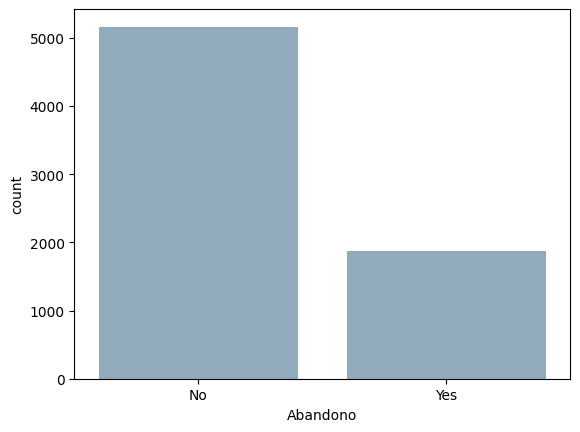

In [242]:
sns.countplot(x='Abandono', data=datos)
plt.show()

**Cual es el porcentaje de abandono de los clientes?**

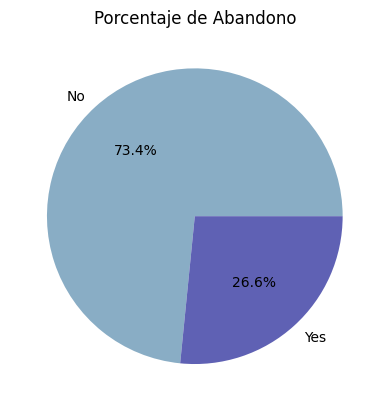

In [246]:
import matplotlib.pyplot as plt

plt.pie(datos['Abandono'].value_counts(), labels=datos['Abandono'].unique(), autopct='%1.1f%%')
plt.title('Porcentaje de Abandono')
plt.show()

**Evasión por tipo de contratación (año, mes, dos años)**

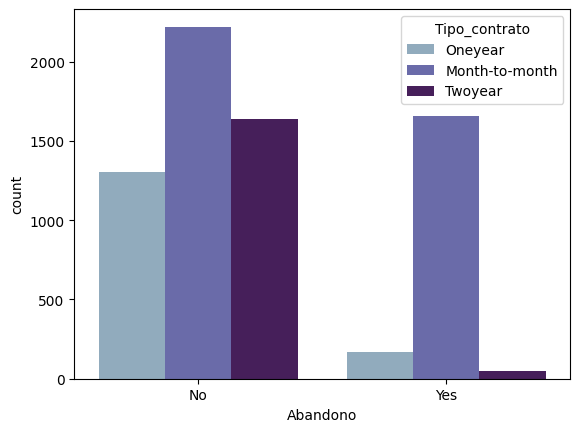

In [243]:
sns.countplot(x='Abandono', hue='Tipo_contrato', data=datos)
plt.show()

**Abandono por genero**

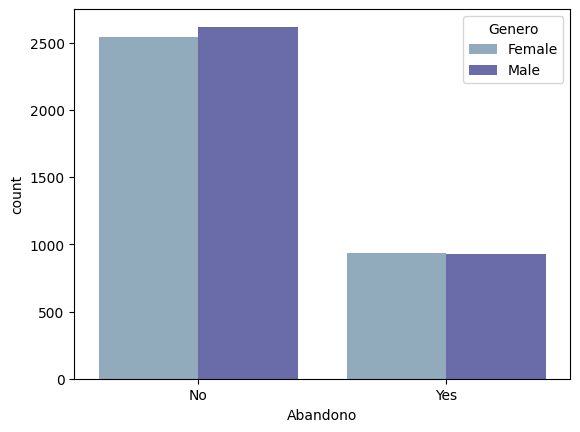

In [244]:
sns.countplot(x='Abandono', hue='Genero', data=datos)
plt.show()

**Abandono por tipo de servicio de internet**

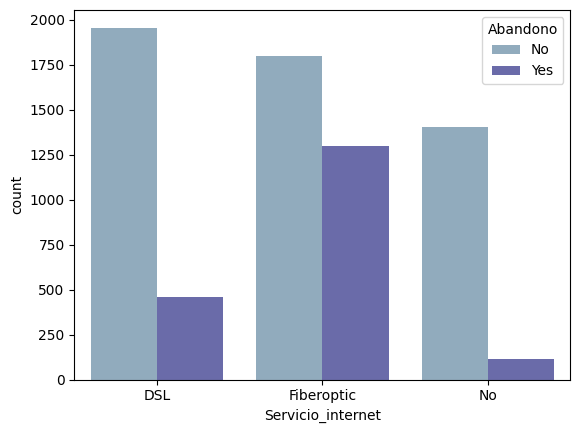

In [245]:
sns.countplot(x='Servicio_internet', hue='Abandono', data=datos)
plt.show()

**Abandono por pago mensual**

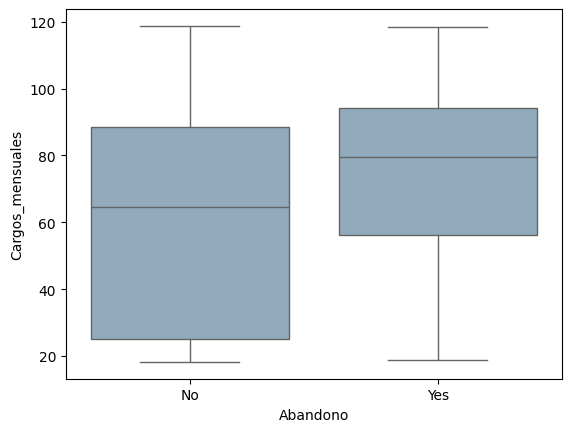

In [249]:
sns.boxplot(x='Abandono', y='Cargos_mensuales', data=datos)
plt.show()

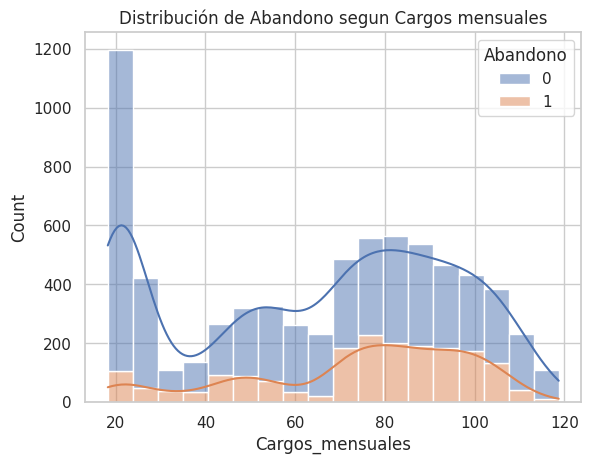

In [359]:
sns.histplot(data=datos, x='Cargos_mensuales', hue='Abandono', kde=True, multiple='stack')
plt.title('Distribución de Abandono segun Cargos mensuales')
plt.show()

  **Abandono por tiempo de ambiguedad**

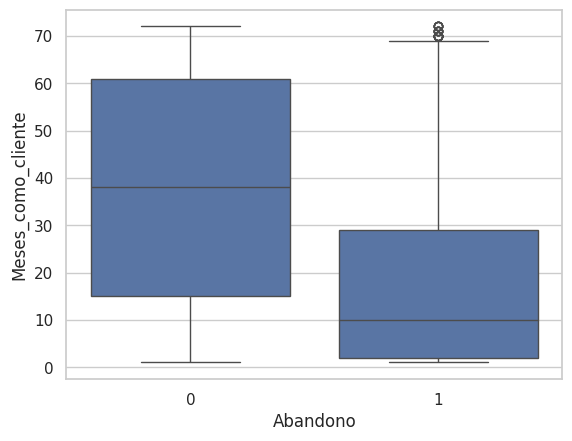

In [347]:
sns.boxplot(x='Abandono', y='Meses_como_cliente', data=datos)
plt.show()

**Buscando correlaciones**

In [275]:
# Seleccionar solo a gente que abandono
datos_abandono = datos[datos['Abandono'] == 'Yes']
# Mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

# Ahora puedes usar head() o cualquier otra función
datos_abandono.head()


,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiberoptic,No,No,Yes,No,No,No,Month-to-month,Yes,Electroniccheck,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiberoptic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electroniccheck,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiberoptic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailedcheck,83.9,267.40,2.796667
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,Yes,No,Yes,No,No,Yes,Oneyear,No,Creditcard(automatic),62.7,2791.50,2.090000
19,0023-HGHWL,Yes,Male,1,No,No,1,No,Nophoneservice,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electroniccheck,25.1,25.10,0.836667


Estandarizar datos categoricos en numericos Yes = 1, No = 0

In [274]:
#Encontrar colummnas categoricas con Yes y No
columnas_categoricas = datos_abandono.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['ID_cliente', 'Abandono', 'Genero', 'Tiene_pareja',
       'Tiene_dependientes', 'Servicio_telefonico', 'Multiples_lineas',
       'Servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Facturacion_sin_papel',
       'Metodo_pago'],
      dtype='object')

In [276]:
columnas_cambiar =[ 'Abandono', 'Tiene_pareja',
       'Tiene_dependientes', 'Servicio_telefonico', 'Multiples_lineas', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Facturacion_sin_papel']

In [277]:
for column in columnas_cambiar:
    datos_abandono[column] = datos_abandono[column].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-2756814787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_abandono[column] = datos_abandono[column].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-2756814787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_abandono[column] = datos_abandono[column].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-2756814787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [278]:
datos_abandono.head()

,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiberoptic,0.0,0.0,1.0,0.0,0.0,0.0,Month-to-month,1,Electroniccheck,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiberoptic,0.0,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Electroniccheck,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiberoptic,0.0,0.0,0.0,1.0,1.0,0.0,Month-to-month,1,Mailedcheck,83.9,267.40,2.796667
18,0022-TCJCI,1,Male,1,0,0,45,1,0.0,DSL,1.0,0.0,1.0,0.0,0.0,1.0,Oneyear,0,Creditcard(automatic),62.7,2791.50,2.090000
19,0023-HGHWL,1,Male,1,0,0,1,0,NaN,DSL,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electroniccheck,25.1,25.10,0.836667


In [280]:
datos_numericos = datos_abandono.select_dtypes(include=['int64', 'float64'])
datos_numericos.head()

,Abandono,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Facturacion_sin_papel,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
2,1,0,0,0,4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,73.9,280.85,2.463333
3,1,1,1,0,13,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,98.0,1237.85,3.266667
4,1,1,1,0,3,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,83.9,267.40,2.796667
18,1,1,0,0,45,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,62.7,2791.50,2.090000
19,1,1,0,0,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,25.1,25.10,0.836667


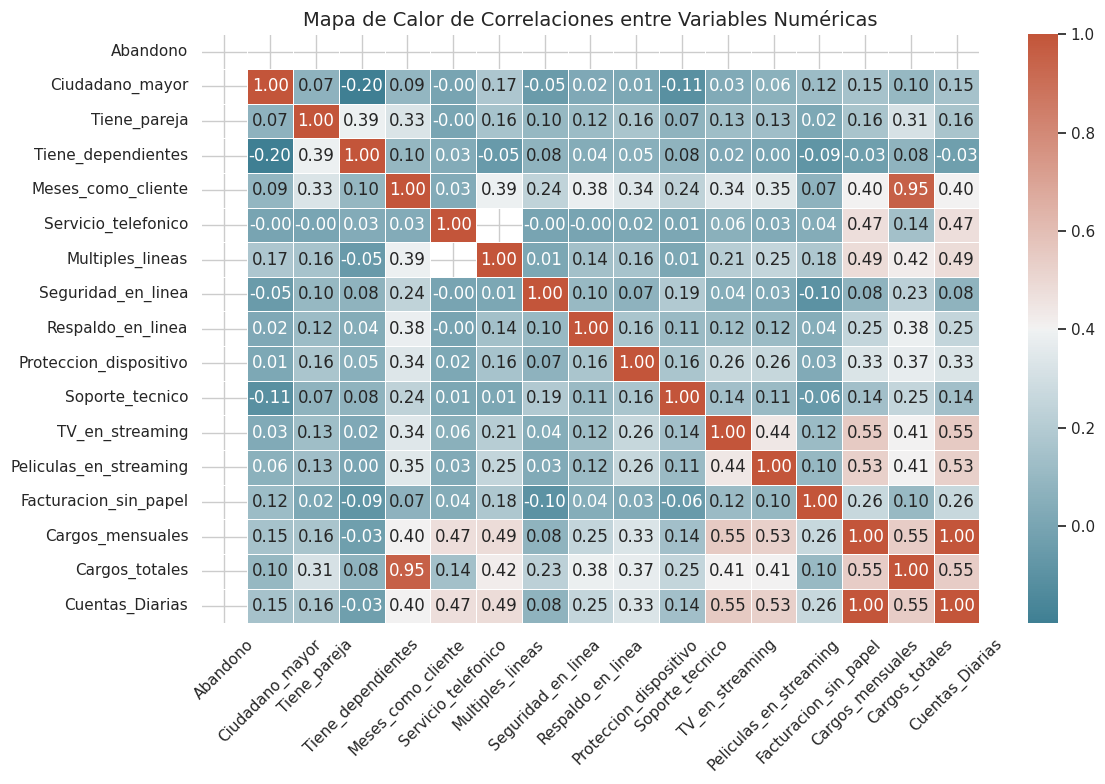

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo y paleta personalizada
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
palette = sns.diverging_palette(220, 20, as_cmap=True)

# Heatmap
sns.heatmap(datos_numericos.corr(), annot=True, cmap=palette, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [318]:
# Transformar unicamente los valores de la columna abandono de yes a 1 y no  a 0'
datos['Abandono'].unique()

array(['No', 'Yes'], dtype=object)

In [320]:
datos['Abandono'] = datos['Abandono'].map({'Yes': 1, 'No': 0})

In [335]:
datos_abandono_generalizado = datos.copy()
datos_abandono_generalizado.head()

,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Oneyear,Yes,Mailedcheck,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailedcheck,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiberoptic,No,No,Yes,No,No,No,Month-to-month,Yes,Electroniccheck,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiberoptic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electroniccheck,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiberoptic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailedcheck,83.9,267.40,2.796667


In [337]:
columnas_a_cambiar= [
 'Tiene_pareja',
 'Tiene_dependientes',
 'Servicio_telefonico',
 'Multiples_lineas',
 'Seguridad_en_linea',
 'Respaldo_en_linea',
 'Proteccion_dispositivo',
 'Soporte_tecnico',
 'TV_en_streaming',
 'Peliculas_en_streaming',
 'Facturacion_sin_papel']

In [338]:
for column in columnas_a_cambiar:
    datos_abandono_generalizado[column] = datos_abandono_generalizado[column].map({'Yes': 1, 'No': 0})

In [339]:
datos_abandono_generalizado.head()

,ID_cliente,Abandono,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Meses_como_cliente,Servicio_telefonico,Multiples_lineas,Servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,0.0,1.0,0.0,1.0,1.0,0.0,Oneyear,1,Mailedcheck,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,0.0,0.0,0.0,0.0,0.0,1.0,Month-to-month,0,Mailedcheck,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiberoptic,0.0,0.0,1.0,0.0,0.0,0.0,Month-to-month,1,Electroniccheck,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiberoptic,0.0,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Electroniccheck,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiberoptic,0.0,0.0,0.0,1.0,1.0,0.0,Month-to-month,1,Mailedcheck,83.9,267.40,2.796667


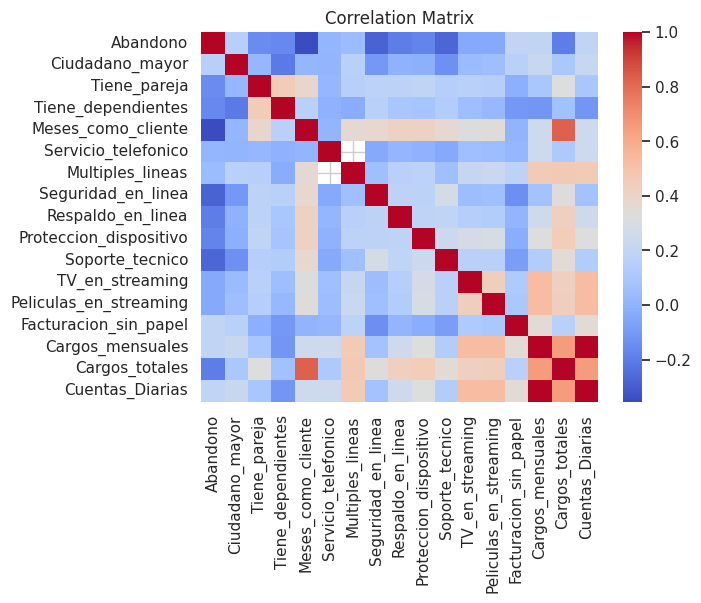

In [344]:
# Select only numerical columns
datos_numericos = datos_abandono_generalizado.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix_generalizado = datos_numericos.corr()

sns.heatmap(correlation_matrix_generalizado, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 📄Informe final

# 📘 Informe Final: Challenge Telecom X – Análisis de Evasión de Clientes

## 🎯 Objetivo del Proyecto
Identificar los factores que influyen en la **cancelación de clientes (Churn)** en Telecom X, utilizando técnicas de ETL, análisis exploratorio y visualización de datos. El propósito es generar insights que ayuden a reducir la tasa de abandono.

---

## 🧾 Preparación de Datos

- **Fuente**: API pública en formato JSON.
- **ETL aplicado**:
  - Extracción y normalización de columnas anidadas (`customer`, `phone`, `internet`, `account`).
  - Unión de todas las tablas en un único DataFrame (`df_normalized`).
  - Limpieza de valores nulos y espacios en blanco, especialmente en `Charges.Total`.

---

## 📊 Análisis Exploratorio y Visualizaciones

### 🔹 Distribución de Abandono (`Churn`)
- Aproximadamente **26% de los clientes abandonaron**.
- El abandono se concentra en clientes con contratos mensuales y facturación electrónica.

### 🔹 Cargos Mensuales (`Charges.Monthly`)
- Clientes con **cargos bajos (~20-40 MXN)** tienden a permanecer.
- Clientes con **cargos altos (>100 MXN)** muestran mayor abandono.
- Gráfico KDE muestra densidades diferenciadas entre clientes que abandonan y los que no.

### 🔹 Tipo de Contrato (`Contract`)
- Contratos **mensuales** tienen la mayor tasa de abandono.
- Contratos **anuales o bianuales** presentan mayor fidelización.

### 🔹 Método de Pago (`PaymentMethod`)
- Métodos como **transferencia electrónica** y **tarjeta de crédito** tienen menor abandono.
- **Pago por cheque** muestra mayor abandono, posiblemente por menor digitalización.

### 🔹 Servicios Adicionales
- Clientes con **seguridad en línea, respaldo, soporte técnico y streaming** tienden a permanecer más tiempo.
- La falta de estos servicios correlaciona con mayor abandono.

### 🔹 Tenencia (`tenure`)
- Clientes con **menos de 12 meses** tienen mayor probabilidad de abandonar.
- La tenencia es uno de los **predictores más fuertes** del churn.

---

## 📈 Gráficos Clave Generados

| Gráfico | Insight Principal |
|--------|-------------------|
| Histograma de `Charges.Monthly` vs `Churn` | Cargos altos correlacionan con abandono |
| Gráfico de barras `Contract` vs `Churn` | Contratos mensuales tienen mayor churn |
| Boxplot `tenure` vs `Churn` | Tenencia baja = mayor abandono |
| Heatmap de correlaciones | `tenure`, `Charges.Total`, y `Contract` son variables relevantes |
| Countplot de `PaymentMethod` | Métodos digitales retienen más clientes |

---


## ✅ Recomendaciones Finales

- Implementar un modelo predictivo de churn usando variables como `tenure`, `Contract`, `Charges.Monthly`, y `PaymentMethod`.
- Diseñar campañas de retención para clientes con baja tenencia y cargos altos.
- Evaluar la experiencia del cliente en contratos mensuales para detectar puntos de fricción.

---

## 📂 Recursos del Proyecto

- [Repositorio en GitHub](https://github.com/MTEmmanue/Challenge_Analisis_Abandono_Clientes)
- [Diccionario de variables](https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md)
- [Notebook en Colab](https://colab.research.google.com/drive/1X-3tiLIxRkIgbAjr1Pk9Bc-EELTSDEre)

---
